# Pitch Classification Using Bayesian Methods

**Goal**: Provide an example of bayesian modeling in PyMC for CIS378 (Applied Machine Learning) <br>
**Author**: Jensen Holm <br>
**Date**: Spring 2025 <br> 

In [1]:
import polars as pl
import statcast_pitches
from plotnine import *  # noqa: F403
from pprint import pprint
import holm_ggtheme

In [2]:
YR = 2024

pitches_df: pl.DataFrame = (statcast_pitches.load()
                            .filter(pl.col('game_date').dt.year() == YR)
                            .drop_nulls(subset=['pitch_type'])
                            .collect())

pprint(pitches_df.collect_schema())

Schema([('pitch_type', String),
        ('game_date', Datetime(time_unit='us', time_zone=None)),
        ('release_speed', Float64),
        ('release_pos_x', Float64),
        ('release_pos_z', Float64),
        ('player_name', String),
        ('batter', Int64),
        ('pitcher', Int64),
        ('events', String),
        ('description', String),
        ('spin_dir', Int64),
        ('spin_rate_deprecated', Int64),
        ('break_angle_deprecated', Int64),
        ('break_length_deprecated', Int64),
        ('zone', Int64),
        ('des', String),
        ('game_type', String),
        ('stand', String),
        ('p_throws', String),
        ('home_team', String),
        ('away_team', String),
        ('type', String),
        ('hit_location', Float64),
        ('bb_type', String),
        ('balls', Int64),
        ('strikes', Int64),
        ('game_year', Int64),
        ('pfx_x', Float64),
        ('pfx_z', Float64),
        ('plate_x', Float64),
        ('plate_z', Float64),

In [3]:
pitches_df = pitches_df.with_columns(
        pl.when(pl.col('pitch_type').is_in(['FF', 'CH', 'CU', 'FC', 'ST']))
        .then(pl.col('pitch_type'))
        .otherwise(pl.lit('other'))
        .alias('pitch_type')
)

pitch_t_freq_df = pitches_df['pitch_type'].value_counts().sort('count', descending=True)

freq_plot = (ggplot(pitch_t_freq_df, aes(x='pitch_type', y='count', fill='count'))
    + geom_bar(stat='identity')
    + theme_classic()
    + labs(title='pitch type frequency'))

release_velo_plot = (ggplot(pitches_df.drop_nans(subset=['release_speed', 'release_spin_rate']), 
        aes(x='release_speed', y='release_spin_rate', color='pitch_type'))
        + geom_point(alpha=0.2)
        + facet_wrap('~pitch_type', scales='fixed')
        + theme_matplotlib()
        + labs(title='Release Speed vs Spin Rate by Pitch Type'))

(release_velo_plot | freq_plot).show()

TypeError: unsupported operand type(s) for |: 'ggplot' and 'ggplot'

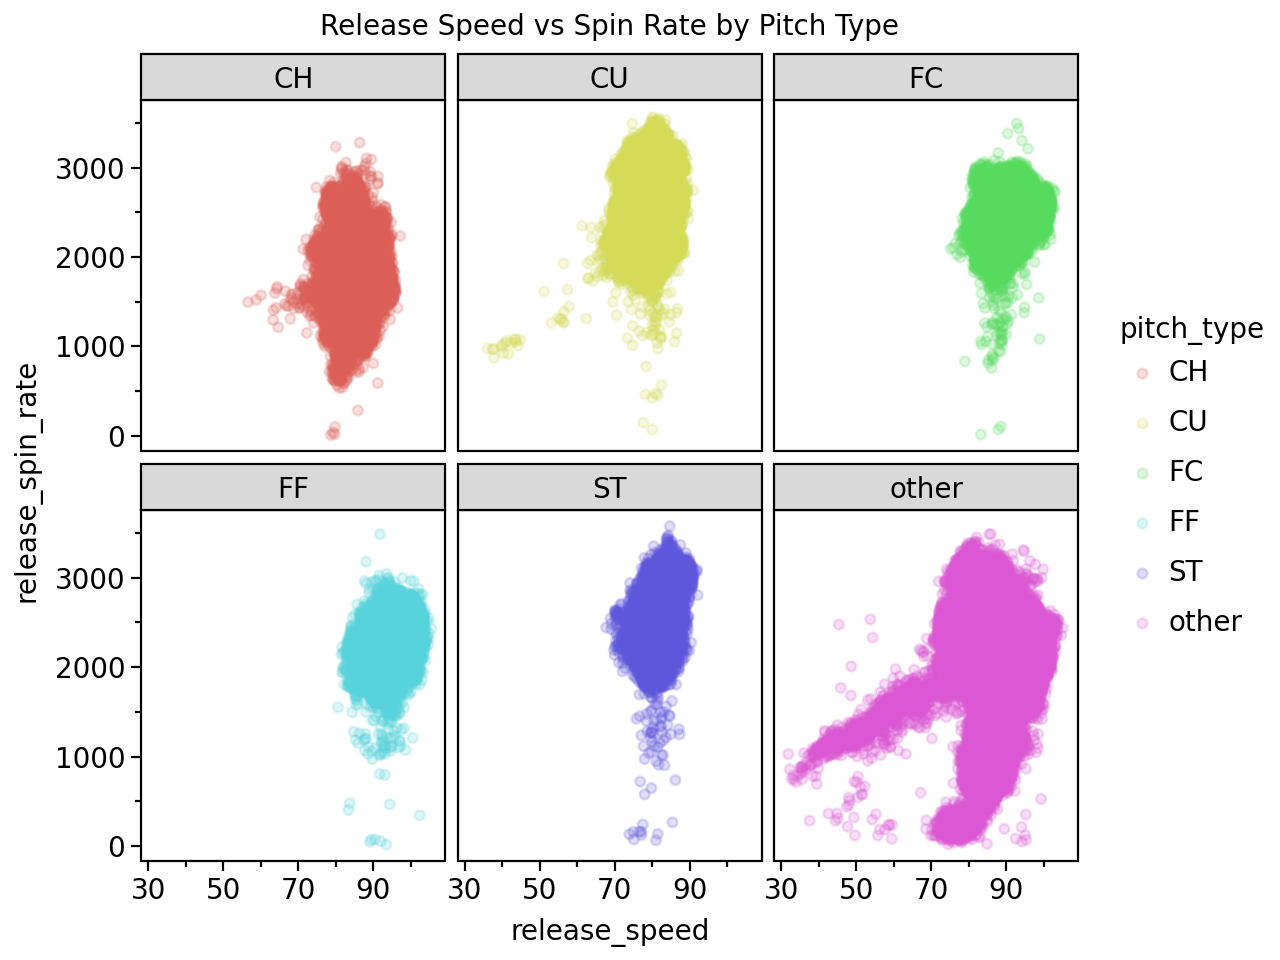

In [4]:

(ggplot(pitches_df.drop_nans(subset=['release_speed', 'release_spin_rate']), 
        aes(x='release_speed', y='release_spin_rate', color='pitch_type'))
    + geom_point(alpha=0.2)
    + facet_wrap('~pitch_type', scales='fixed')
    + theme_matplotlib()
    + labs(title='Release Speed vs Spin Rate by Pitch Type'))


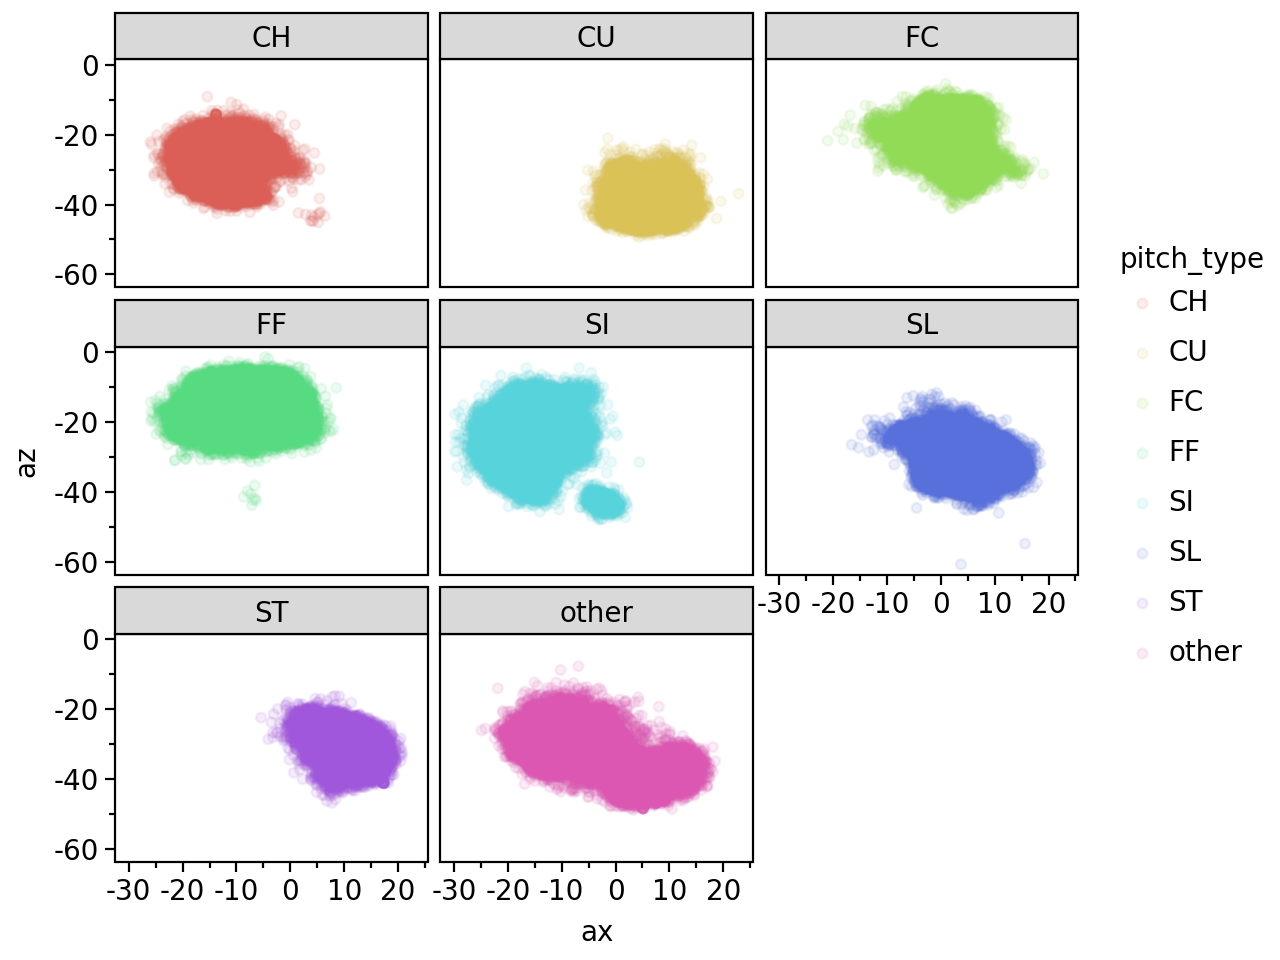

In [ ]:

(ggplot(
    pitches_df.drop_nans(subset=['ax', 'az']).filter(pl.col('p_throws') == 'R'), 
    aes(x='ax', y='az', color='pitch_type'))
    + geom_point(alpha=0.1)
    + facet_wrap('~pitch_type', scales='fixed')
    + theme_matplotlib()
    + labs(title=''))


## Feature Selection

In [ ]:
# code

## Base Model

In [37]:
# code

## Bayesian Model